# Laptop Price Prediction

## Dataset Description

 
### Aim
The prediction task is to determine whether the price of a laptop is over $50K or not.

## <b>2. Exploratory Data Analysis</b>

### 2.1 Importing Libraries and Dataset

##### Importing Required Libraries


In [1]:
# Generic Data handling Libraries
import pandas as pd
import numpy as np

#Graph plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Sklearn Libraries for model building
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##### loading  required dataset

In [2]:
df = pd.read_csv("laptop_data.csv")

#### Printing dataset

In [3]:
print(df)

      Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...            

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

### dataset description

In [5]:
df.describe(include='all')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,19,6,NaN,40,118,9,39,110,9,179,NaN
top,Dell,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,297,727,NaN,507,190,619,412,281,1072,121,NaN
mean,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59870.042910
std,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37243.201786
min,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52054.560000
75%,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79274.246400


#### no. of records and attributes in a datset 

In [6]:
print("Total number of records:",df.shape[0])
print("Total number of attributes:",df.shape[1])

Total number of records: 1303
Total number of attributes: 11


#### Data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


#### attributes names

In [8]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

### Converting price attribute to categorical value by replacing  values with value greater than mean of price attribute and considering 1 as value greater than 50K and 0 as value less than 50k 

In [9]:
# df["Price"].mean()
df["Price"]

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [10]:
df['Price']=np.where(df["Price"]>=df["Price"].mean(),1,0)
#df['Price'] = np.where(df['Price'] <=50000,"<=50k",">50k")
print(df["Price"].value_counts())
df["Price"]


0    767
1    536
Name: Price, dtype: int64


0       1
1       0
2       0
3       1
4       1
       ..
1298    0
1299    1
1300    0
1301    0
1302    0
Name: Price, Length: 1303, dtype: int32

#### removing the string values  like 'gb' from Ram column and assigning values in the form of 0 and 1 to Touchscreen and  IPS column

In [11]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [12]:
df['ScreenResolution'].value_counts()
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [13]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [14]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

### Sampling of dataset

In [15]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
619,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,0,1,1,IPS Panel Touchscreen 1366,768
1000,Acer,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.70,1,0,1,IPS Panel Full HD 1920,1080
1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,1,0,0,4K Ultra HD 3840,2160
617,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.84,1,0,0,Full HD 1920,1080
23,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,0,1,0,Full HD / Touchscreen 1920,1080


In [16]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [17]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [18]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [19]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [20]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

#### Finding total no of cpu values

In [21]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [22]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [23]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [24]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [25]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [26]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [27]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [28]:
df = df[df['Gpu brand'] != 'ARM']

In [29]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [30]:
df.drop(columns=['Gpu'],inplace=True)

In [31]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,1,0,1,226.983005,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,0,0,0,127.677940,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,No OS,1.86,0,0,0,141.211998,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,1,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,1,0,1,226.983005,Intel Core i5,Intel


In [32]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [33]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [34]:
df['os'] = df['OpSys'].apply(cat_os)

In [35]:
df.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,Gpu brand,os
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,1,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,0,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,No OS,1.86,0,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,1,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,1,0,1,226.983005,Intel Core i5,Intel,Mac


In [36]:
df.drop(columns=['OpSys'],inplace=True)

##### Correlation Matrix of numerical attributes

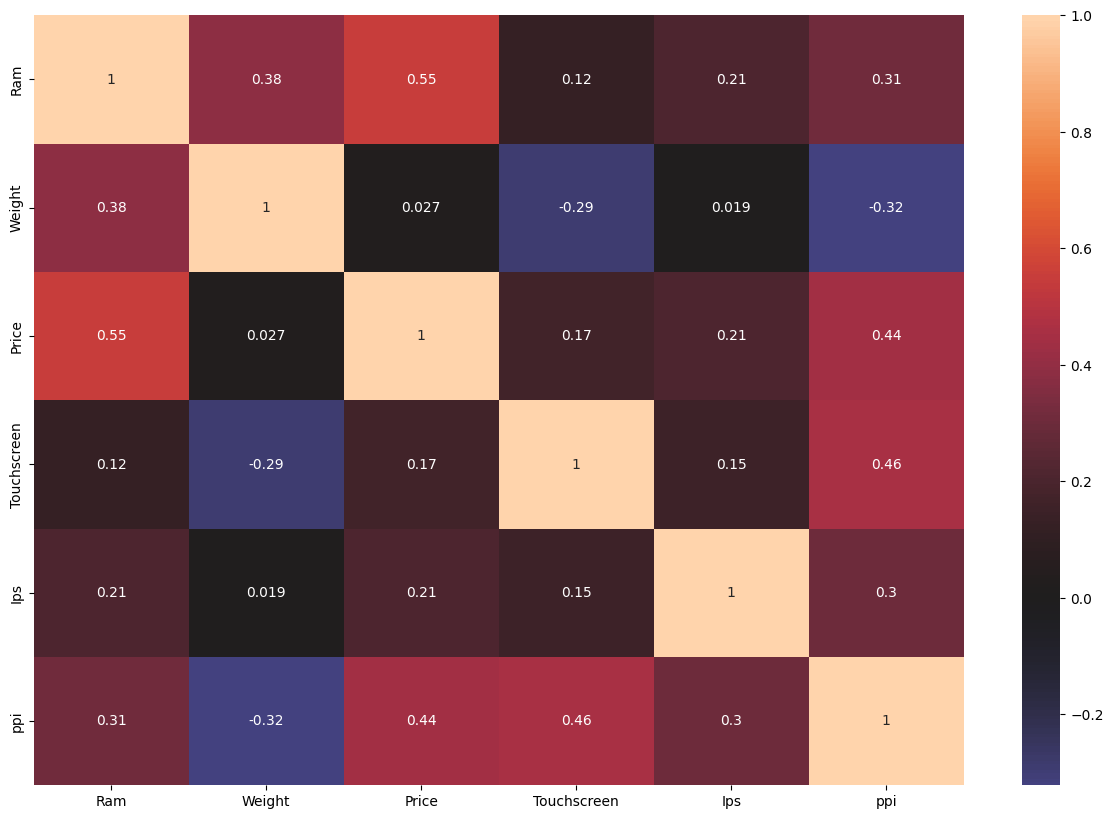

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,center = 0)
plt.show()

##### Number of Records (Type wise)

In [38]:
fig = px.bar(df.groupby('TypeName')['TypeName'].count().reset_index(name='count'), 
             x='TypeName', 
             y='count', 
             title='Number of Records (Type Wise)', 
             labels={'TypeName': 'Type', 'count': 'Number of Records'},
             color='TypeName')
fig.show()

##### Number of Records (Company wise)

In [39]:
#Plotting Graph of Number of Records grouped by Native Country
temp = df['Company'].groupby(df['Company']).count().reset_index(name='count')
fig = px.bar(temp, 
             y='Company', 
             x='count', 
             title='Number of Records (company Wise)', 
             labels={'Company': 'company', 'count': 'Number of Records'})
fig.update_layout(height=900)
fig.show()

#### Weight vs probability  of price distribution

In [40]:


df["Weight"]=df["Weight"].astype(int)
temp=df.groupby('Weight')['Price'].value_counts().sort_index()
# Plotting Graph
print(temp) 
t=[0]
for i in range(1,5):
      t.append(round((temp[i][0])/(temp[i][0]+temp[i][0]),2))
print(t)
temp = {}
temp['weight'] = np.arange(np.min(df.Weight),np.max(df.Weight)+1)
temp['probability']= t
print(temp['weight'])
fig = px.bar(pd.DataFrame(temp),
             x='weight',
             y='probability',
             color='weight',
             color_discrete_sequence="Rdgnbu",
             title='Weight vs Probability of Price >50K',
             labels={'Weight':'Weight','probability':'Probability of Price >50K'})
fig.show()


Weight  Price
0       0          5
        1         13
1       0        287
        1        280
2       0        462
        1        166
3       0         11
        1         43
4       0          1
        1         34
Name: Price, dtype: int64
[0, 0.5, 0.5, 0.5, 0.5]
[0 1 2 3 4]


In [41]:
df['Touchscreen'] = np.where(df['Touchscreen']== 0,"no","yes")
totalram = df.groupby('Touchscreen').Price.value_counts()
print(totalram)
print(totalram[3])
no=totalram[1]/totalram[0]

yes=totalram[3]/totalram[2] 
print(no)
print(yes)
temp={}
temp['probab']=yes,no
temp['ramr']=['yes','no']
print(temp)
ramgraph=pd.DataFrame(temp)
fig = px.bar(ramgraph,
            x = 'ramr',
            y = 'probab',
            color='probab')
fig.update_xaxes(title_text='TouchScreen')
fig.update_yaxes(title_text='Probabilty of Price')
fig.show()

Touchscreen  Price
no           0        693
             1        418
yes          1        118
             0         73
Name: Price, dtype: int64
73
0.6031746031746031
0.6186440677966102
{'probab': (0.6186440677966102, 0.6031746031746031), 'ramr': ['yes', 'no']}


 # 3. Data Pre-Processing

## Copying Original Dataset

In [42]:
df1=df.copy()

### Finding null values

In [43]:
df1.isnull().sum()

Company        0
TypeName       0
Ram            0
Memory         0
Weight         0
Price          0
Touchscreen    0
Ips            0
ppi            0
Cpu brand      0
Gpu brand      0
os             0
dtype: int64

#### checking if there is any missing value exists or not, if exists then replace missing value  with max value of that column

In [44]:
print(df1[df1==' ?'].count())
df1[df1==' ?']=np.nan

# for col in ['Weight', 'ppi']: 
#     df1[col].fillna(df1[col].mode()[0], inplace=True)
# df1.dropna(inplace=True) 




Company        0
TypeName       0
Ram            0
Memory         0
Weight         0
Price          0
Touchscreen    0
Ips            0
ppi            0
Cpu brand      0
Gpu brand      0
os             0
dtype: int64


### dropping duplicate records

In [45]:
print(df1.shape)
df1[df1.duplicated()]
df1.drop_duplicates(inplace=True)

(1302, 12)


#### determing outliers in the dataset

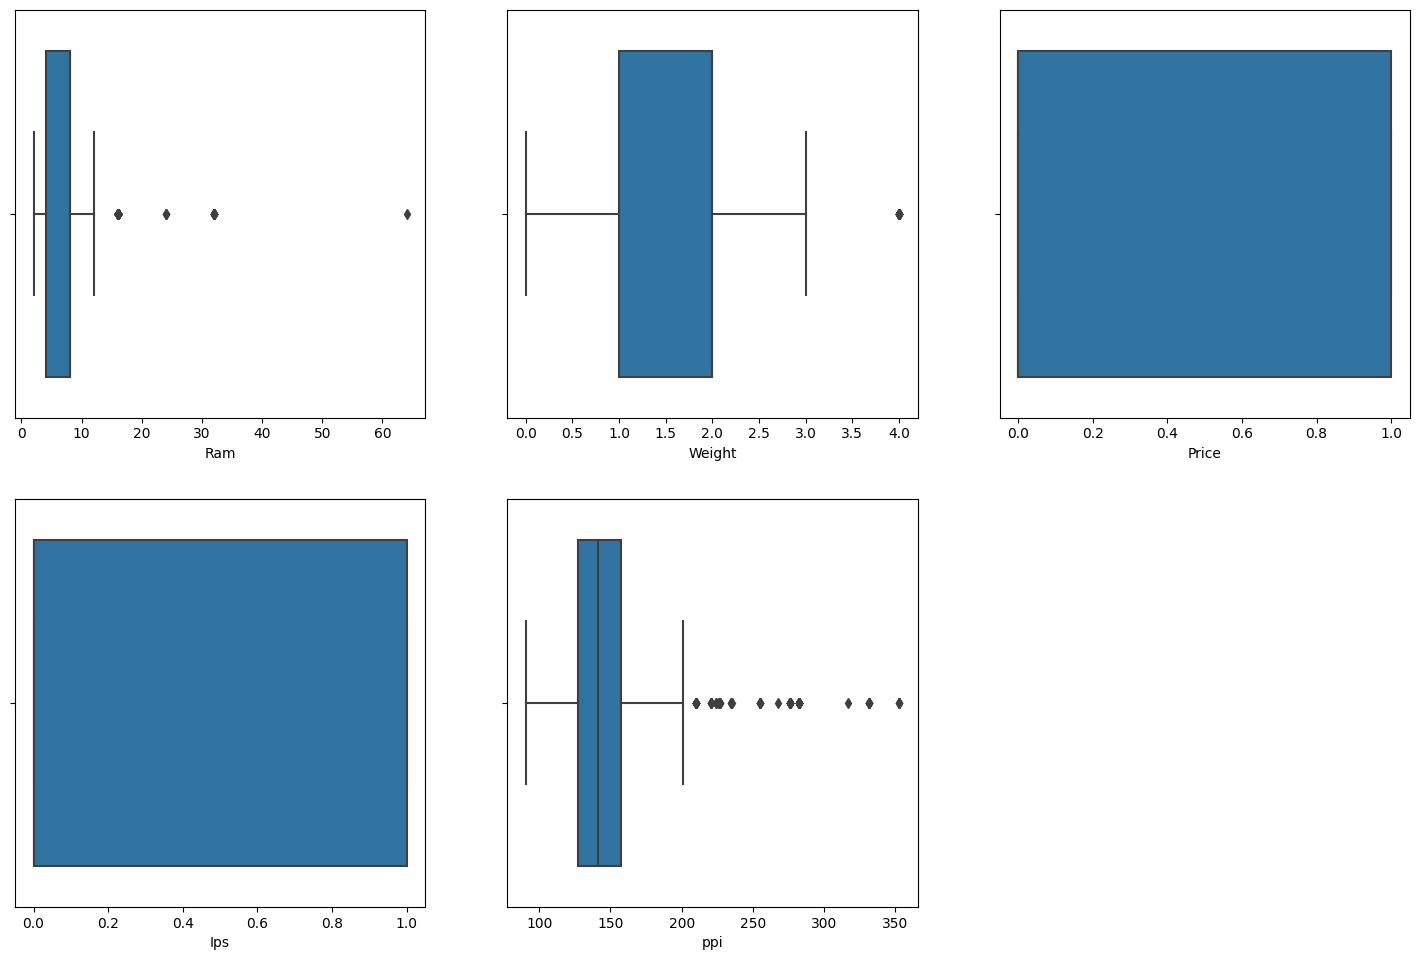

In [46]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df1.select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(data=df1, x=col, ax=ax)

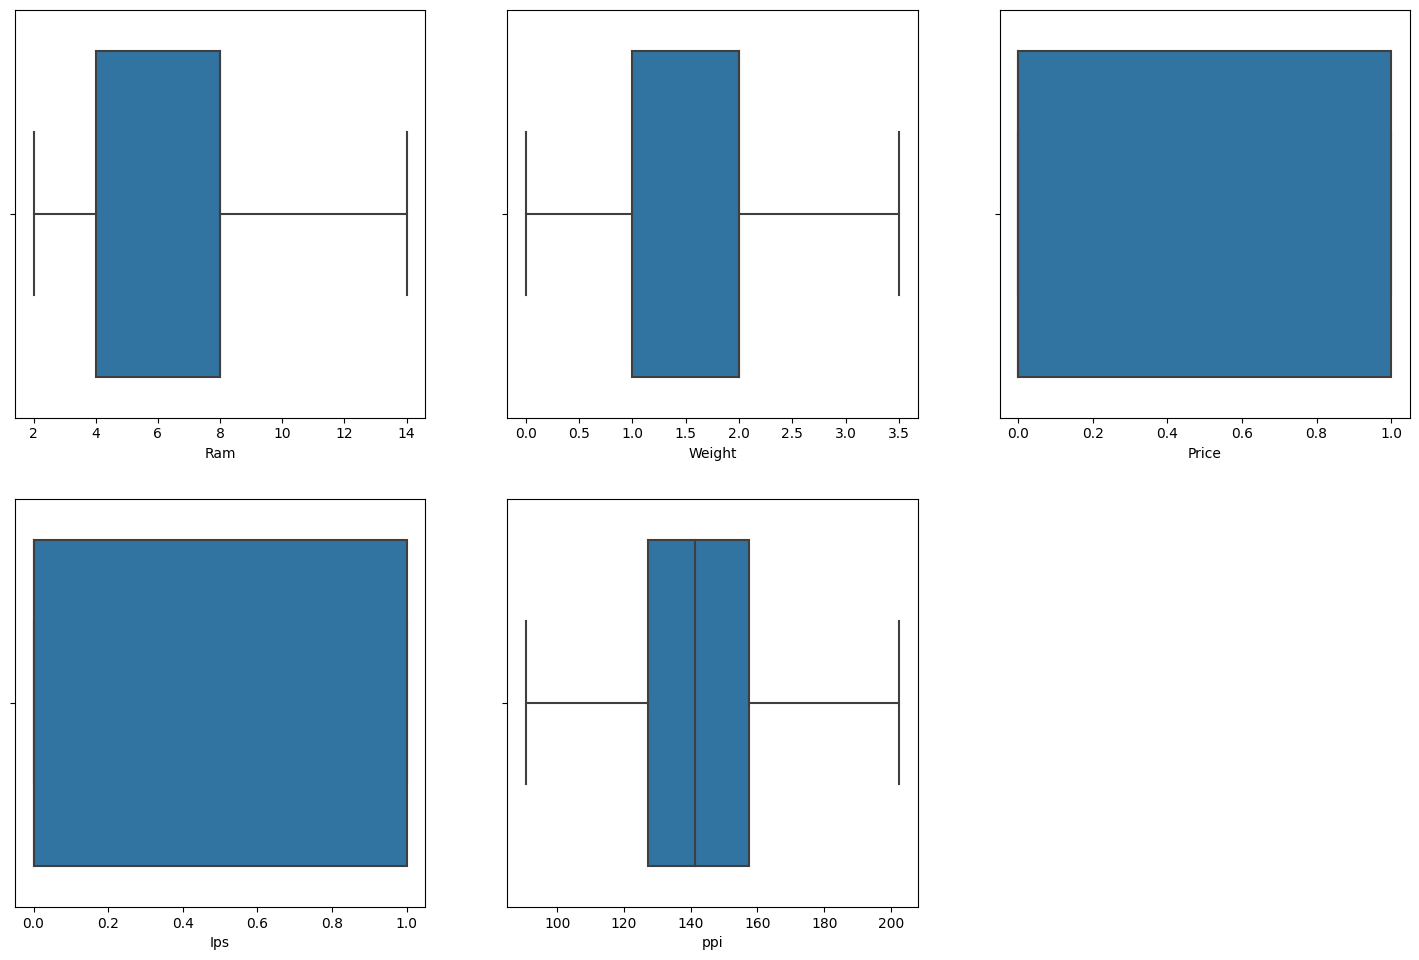

In [47]:
def remove_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return data.clip(lower_bound, upper_bound, axis=1)

df1.iloc[:,:11] = remove_outliers(df1.iloc[:,:11])
plt.figure(figsize=(18, 18))
for i, col in enumerate(df1.select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(data=df1, x=col, ax=ax)


In [48]:
#df1['Price'] = df1['Price'].astype(int)
#df1['Price'] = np.where(df1['Price'].mean(),0,1)
# print(df1)
# df1['Price'] = np.where(df1['Price']== "<=50K",0,1)
# print(df1)
# df1['Price'].value_counts()

#### converting categorical attributes to numerical

In [49]:
df1=pd.get_dummies(df)

#### Feature Scaling

In [50]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(df1.drop('Price',axis=1))
Y=df1.Price
X=X_Scaled

# 4. Model Building Using Different Classifiers

# Logistic Regression Model

In [51]:
LRModel = LogisticRegression()
def logisticReg(x_train,x_test,y_train,y_test):
    LRModel.fit(x_train,y_train)
    y_pred = LRModel.predict(x_test)
    return confusion_matrix(y_test,y_pred)

# K-Nearest Neighbour Classifier

In [52]:
knn = KNeighborsClassifier(n_neighbors = 5)
def KNearestNeighbours(x_train,x_test,y_train,y_test):
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    return confusion_matrix(y_test,y_pred)

# Decision Tree Classifier

In [53]:

decision_tree = DecisionTreeClassifier()
def decisionTree(x_train,x_test,y_train,y_test):
    decision_tree.fit(x_train, y_train)
    y_pred = decision_tree.predict(x_test)
    return confusion_matrix(y_test,y_pred)

# Gaussian Naive Bayes Classifier

In [54]:
gb = GaussianNB()
def naiveBayes(x_train,x_test,y_train,y_test):
    gb.fit(x_train, y_train)
    y_pred = gb.predict(x_test)
    return confusion_matrix(y_test,y_pred)

# K-Fold Cross Validation

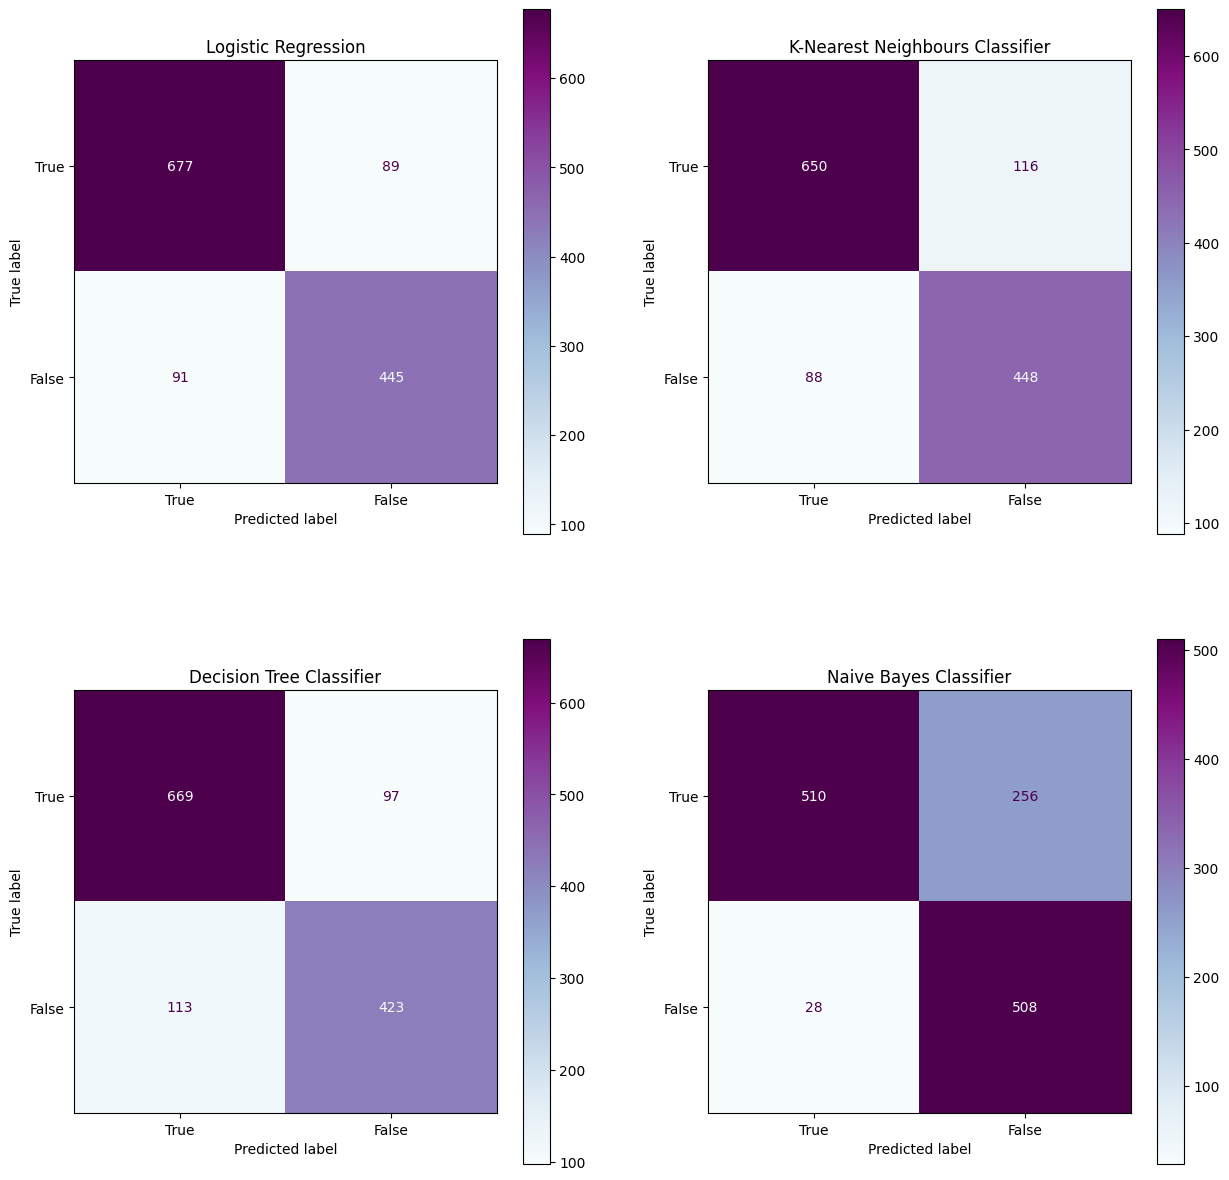

In [55]:
LRConfusionMatrix = 0
KNNConfusionMatrix = 0
DTConfusionMatrix = 0
NBConfusionMatrix = 0
f = KFold(n_splits = 5)
for train_index,test_index in f.split(X):

    x_train=X[train_index]
    x_test=X[test_index]
    y_train=Y.iloc[train_index]
    y_test=Y.iloc[test_index]
    

    # Logistic Regression
    temp = logisticReg(x_train,x_test,y_train,y_test)
    LRConfusionMatrix = LRConfusionMatrix + temp
    
    # K-Nearest Neighbours
    temp = KNearestNeighbours(x_train,x_test,y_train,y_test)
    KNNConfusionMatrix = KNNConfusionMatrix + temp
    
    # Decision Tree Classifier
    temp = decisionTree(x_train,x_test,y_train,y_test)
    DTConfusionMatrix = DTConfusionMatrix + temp
    
    # Gaussian Naive Bayes Classifier
    temp = naiveBayes(x_train,x_test,y_train,y_test)
    NBConfusionMatrix = NBConfusionMatrix + temp
    
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,15))
ConfusionMatrixDisplay(LRConfusionMatrix,display_labels = [True,False]).plot(ax = ax1,cmap='BuPu')
ax1.title.set_text("Logistic Regression")
ConfusionMatrixDisplay(KNNConfusionMatrix,display_labels = [True,False]).plot(ax = ax2,cmap='BuPu')
ax2.title.set_text("K-Nearest Neighbours Classifier")
ConfusionMatrixDisplay(DTConfusionMatrix,display_labels = [True,False]).plot(ax = ax3 , cmap='BuPu')
ax3.title.set_text("Decision Tree Classifier")
ConfusionMatrixDisplay(NBConfusionMatrix,display_labels = [True,False]).plot(ax = ax4 , cmap='BuPu')
ax4.title.set_text("Naive Bayes Classifier")
plt.show()


In [56]:
def calculate_scores(confusionMatrix):
    TP = confusionMatrix[0][0]
    FN = confusionMatrix[0][1]
    FP = confusionMatrix[1][0]
    TN = confusionMatrix[1][1]
    precision = round(TP/(TP+FN),2)
    recall = round(TP/(TP+FP),2)
    f1 = round((2*precision*recall) / (precision + recall),2)
    accuracy = round((TP+TN) / (TP + FP + TN + FN),2)
    return precision,recall,f1,accuracy

LRpr,LRre,LRf1,LRac = calculate_scores(LRConfusionMatrix)
KNNpr,KNNre,KNNf1,KNNac = calculate_scores(KNNConfusionMatrix)
DTpr,DTre,DTf1,DTac= calculate_scores(DTConfusionMatrix)
NBpr,NBre,NBf1,NBac = calculate_scores(NBConfusionMatrix)


data = {
    'Classifier' : ['Logistic Regression','K-Nearest Neighbours','Decision Tree','Naive Bayes'],
    'Precision' : [LRpr,KNNpr,DTpr,NBpr],
    'Recall' : [LRre,KNNre,DTre,NBre],
    'F1-Score' : [LRf1,KNNf1,DTf1,NBf1],
    'Accuracy' : [LRac,KNNac,DTac,NBac]
}
plotdata = pd.DataFrame(data)

fig = px.bar(plotdata.melt(id_vars='Classifier',var_name='Parameter',value_name='Value'), 
             x='Value', y = 'Classifier', 
             color='Parameter',
             barmode='group',
             text='Value',
             labels='Parameter')


fig.update_layout(title='Model Parameters Graph',yaxis_title='Classifiers',hoverlabel=dict(bgcolor='mistyrose', font_size=15),height=600)
fig.show()